# 27. Pandas Project - 주식 가격 분석

In [1]:
# !pip install pandas-datareader
# !pip install finance-datareader

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data_reader
import FinanceDataReader as fdr
import datetime

## 삼성전자 주식 가격

- 데이터 불러오기

In [3]:
SAMSUNG = data_reader.DataReader("005930.KS", data_source="yahoo")
SAMSUNG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-05,46900.0,45960.0,46240.0,46760.0,11716100.0,40377.589844
2017-09-06,47180.0,46700.0,46760.0,47000.0,10811050.0,40584.824219
2017-09-07,48220.0,47000.0,47000.0,48120.0,9676500.0,41551.960938
2017-09-08,49180.0,48580.0,48700.0,49080.0,10893000.0,42380.925781
2017-09-11,50180.0,49500.0,49700.0,49800.0,10374750.0,43002.644531


In [4]:
SAMSUNG.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-29,58900.0,58600.0,58700.0,58600.0,9841329.0,58600.0
2022-08-30,59000.0,58300.0,58700.0,58800.0,9690044.0,58800.0
2022-08-31,59900.0,58200.0,58200.0,59700.0,14203512.0,59700.0
2022-09-01,58900.0,58300.0,58700.0,58400.0,14905777.0,58400.0
2022-09-02,58600.0,57500.0,58300.0,57500.0,15040310.0,57500.0


- 데이터 시각화

<AxesSubplot:xlabel='Date'>

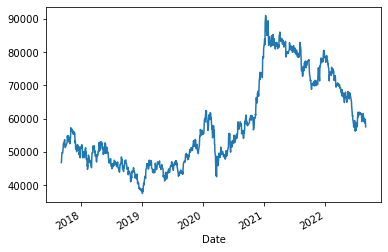

In [5]:
SAMSUNG['Close'].plot()

- csv 파일 저장

In [6]:
SAMSUNG.to_csv("SAMSUNG.csv")

## 데이터 불러오기 일반 함수화

In [7]:
def get_stock_price(country, ticker):
    if country == "KR":
        df = data_reader.DataReader(ticker + ".KS", data_source="yahoo")
    elif country == "US":
        df = data_reader.DataReader(ticker, data_source="yahoo")
    return df

- Tesla 주가 불러오기

In [8]:
df = get_stock_price("US", "TSLA")
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-05,23.699333,23.059334,23.586666,23.306000,57526500.0,23.306000
2017-09-06,23.398666,22.770666,23.299999,22.968666,61371000.0,22.968666
2017-09-07,23.498667,22.896667,23.065332,23.374001,63588000.0,23.374001
2017-09-08,23.318666,22.820000,23.266001,22.893333,48952500.0,22.893333
2017-09-11,24.247334,23.333332,23.423332,24.246000,115006500.0,24.246000


-  주가 변화 시각화

<AxesSubplot:xlabel='Date'>

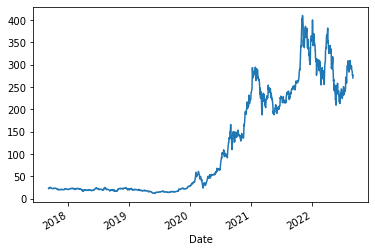

In [9]:
df['Close'].plot()

## 여러 주식 종목의 가격 비교

- 주식 종목 불러오기

In [11]:
tesla = get_stock_price("US", "TSLA")
ford = get_stock_price("US", "FORD")
apple = get_stock_price("US", "AAPL")
google = get_stock_price("US", "GOOGL")
sec = get_stock_price("KR", "005930")

- 비트코인 가격 불러오기

In [12]:
start = datetime.datetime(2017, 8, 1)

bit = fdr.DataReader("BTC/USD", data_source="yahoo", start=start)
bit.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2017-08-01,2747.0,2883.3,2946.0,2659.6,123170.0,-0.0473
2017-08-02,2720.5,2747.0,2773.8,2668.9,81820.0,-0.0096
2017-08-03,2810.0,2720.5,2822.9,2717.6,68100.0,0.0329
2017-08-04,2878.5,2810.0,2892.7,2779.5,68760.0,0.0244
2017-08-05,3262.8,2878.5,3344.0,2875.9,159400.0,0.1335


### Normalized Price

- 시초가를 1 로 맞추어 놓고 변화된 상대 가격 비교

In [13]:
tesla['normed Close'] = tesla['Close']/tesla['Close'][0]
ford['normed Close'] = ford['Close']/ford['Close'][0]
apple['normed Close'] = apple['Close']/apple['Close'][0]
google['normed Close'] = google['Close']/google['Close'][0]
sec['normed Close'] = sec['Close']/sec['Close'][0]
bit['normed Close'] = bit['Close']/bit['Close'][0]

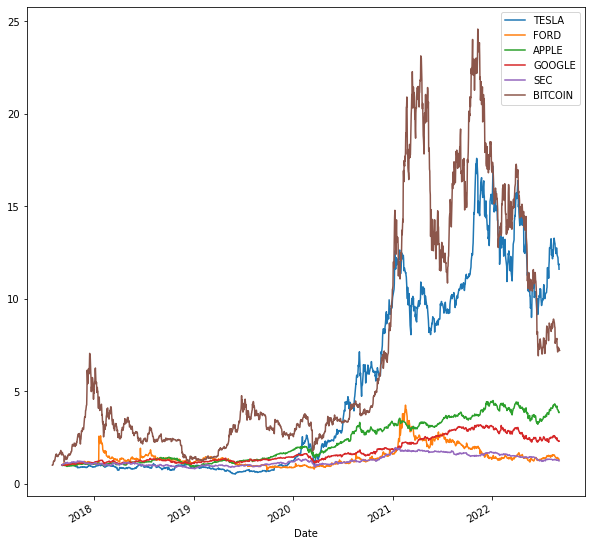

In [14]:
plt.figure(figsize=(10, 10))
tesla['normed Close'].plot(label='TESLA')
ford['normed Close'].plot(label='FORD')
apple['normed Close'].plot(label='APPLE')
google['normed Close'].plot(label='GOOGLE')
sec['normed Close'].plot(label='SEC')
bit['normed Close'].plot(label='BITCOIN')
plt.legend()